In [5]:
from sys import path

path += ['..']

In [6]:
from mylib import Puller, PlotDisplayer, Slider
import asyncio
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

Loading BokehJS ...

In [7]:
pl = Puller()

[(13, 90113195), (13, 90113196), (13, 90113197)]


C:\Users\ariva\projects\table_control\jupiter\..\mylib\motors.py:230: RuntimeWarning: coroutine 'Motor.MoveTo' was never awaited
  self.MoveTo(self.saveX, self.saveV, self.saveA)


In [8]:
async def lmot(x, v, a):
    for _ in range(3):
        await pl.ms.motorL.Move(x, v, a)
        await pl.ms.motorL.Move(-x, v, a)


async def rmot(x, v, a):
    for _ in range(3):
        await pl.ms.motorR.Move(x, v, a)
        await pl.ms.motorR.Move(-x, v, a)


async def mmot(x, v, a):
    for _ in range(10):
        await pl.ms.motorM.Move(x, v, a)
        await pl.ms.motorM.Move(-x, v, a)

In [9]:
async def run_all(x=10, v=10, a=5):
    tasks = []
    if type(x) == tuple:
        tasks.append(asyncio.create_task(lmot(x=x[0], v=v[0], a=a[0])))
        tasks.append(asyncio.create_task(rmot(x=x[1], v=v[1], a=a[1])))
        tasks.append(asyncio.create_task(mmot(x=x[2], v=v[2], a=a[2])))
    else:
        tasks.append(asyncio.create_task(lmot(x=x, v=v, a=a)))
        tasks.append(asyncio.create_task(rmot(x=x, v=v, a=a)))
        tasks.append(asyncio.create_task(mmot(x=x, v=v, a=a)))
    await asyncio.wait(tasks)

In [10]:
# await run_all((10, 10, 1), (15,) * 3, (20,) * 3)

In [11]:
dp = PlotDisplayer()
# dp2=PlotDisplayer()
# dp2.CreateMaket(mainParam= 'time',obr_coff=pd.DataFrame({
#     'time': pl.times,
#     'kof': pl.trueKmas
# }))
dp.CreateMaket(
    mainParam='time',
    power=pl.data[['time', 'power']],
    tension=pl.data[['time', 'tension', 'tensionWgl', 'tensionEXPgl']],
    motors=pl.data[['time', 'motorR', 'motorL', 'motorM']])
pl.pd = dp
sl = Slider()
sl.NewSl('v', min=0.1, max=5, value=15, step=0.1)
sl.NewSl('a', min=0.1, max=5, value=15, step=0.1)
sl.NewSl('window', min=50, max=10000, value=100, step=50)
sl.NewSl('molibdenH', min=-10, max=2.5, value=0.0, step=0.1)
sl.NewSl('Kp', min=0, max=10, value=0.15, step=0.01)
sl.NewSl('Ki', min=0, max=10, value=0.4, step=0.01)
sl.NewSl('Kd', min=-100, max=100, value=0, step=0.01)
sl.NewSl('T0', min=0, max=200, value=5 * 2, step=0.01)
sl.NewSl('end', min=0, max=1, step=1, value=0)
pl.sl = sl

In [12]:
await pl.ms.MoveToStart(
    zapas=10)  # сдвиг моторчиков на начальные позиции для растяжки

In [13]:
pl.ms.x0 = 80
async def g():
    async with pl:
        pass

# pl.pd.Show()
pl.sl.Display()
asyncio.create_task(g())

<Task pending name='Task-7' coro=<g() running at C:\Users\ariva\AppData\Local\Temp\ipykernel_6532\696260055.py:2>>

dLnew: 0.9579381338107633 Xnew: 0.0 : 0.9579381338107633
aaaa
dLnew: -4.415876748075625 Xnew: 2.028276924193051e-06 : -4.415876748075625
dLnew: 4.415876214391268 Xnew: 2.028276924193051e-06 : 4.415876214391268
dLnew: -4.415875680706911 Xnew: 2.028276924193051e-06 : -4.415875680706911
dLnew: 4.415875147022554 Xnew: 2.028276924193051e-06 : 4.415875147022554
dLnew: -4.415874613338197 Xnew: 2.028276924193051e-06 : -4.415874613338197
dLnew: 4.415874079653854 Xnew: 2.028276924193051e-06 : 4.415874079653854
dLnew: -4.415873545969511 Xnew: 2.028276924193051e-06 : -4.415873545969511
dLnew: 4.415880641679685 Xnew: 2.028276924193051e-06 : 4.415880641679685
dLnew: -4.415880107995342 Xnew: 2.028276924193051e-06 : -4.415880107995342
dLnew: 4.415879574310999 Xnew: 2.028276924193051e-06 : 4.415879574310999
dLnew: -4.415879040626642 Xnew: 2.028276924193051e-06 : -4.415879040626642
dLnew: 4.415878506942285 Xnew: 2.028276924193051e-06 : 4.415878506942285
dLnew: -4.415877973257942 Xnew: 2.028276924193051e

In [1]:
import numpy as np

In [12]:
np.savetxt('dts.csv', pl.dts)

In [4]:
print(pl.dts is None)

NameError: name 'pl' is not defined

In [2]:
from matplotlib import pyplot as plt

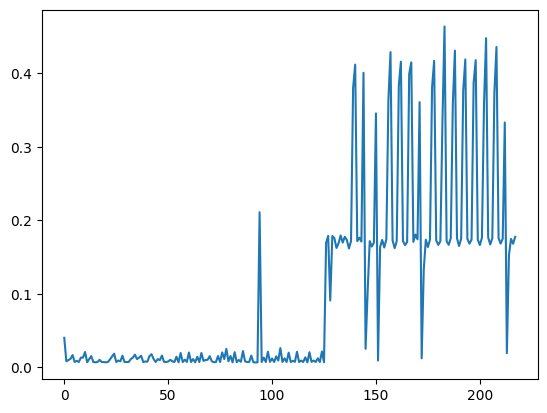

In [12]:
plt.plot(pl.dts)

In [3]:
np.savetxt('tsm.csv', pl.dtsm)
np.savetxt('dts2.csv', pl.dts2)

NameError: name 'pl' is not defined

In [14]:
tsm = np.array(pl.dtsm)
dtsm = tsm[1:] - tsm[:-1]

In [1]:
plt.plot(dtsm)

NameError: name 'plt' is not defined

In [2]:
plt.plot(pl.dts2)

NameError: name 'plt' is not defined

In [3]:
plt.plot(pl.dts2)

NameError: name 'plt' is not defined

In [13]:
dp.Apdate()

In [9]:
await asyncio.wait([
    pl.ms.motorM.MoveTo(0),
    pl.ms.motorL.MoveTo(0),
    pl.ms.motorR.MoveTo(0)
])

TypeError: Passing coroutines is forbidden, use tasks explicitly.

In [17]:
if not pl.dts is None:
    await pl.ms.motorR.MoveTo(0)